In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
import torch.nn as nn
import torch.optim as optim
import yfinance as yf
import pandas_ta as ta 

In [33]:
# Load the data from the two CSV files
date=datetime.today().date()
data=yf.download('ICICIBANK.NS',start='2024-02-19',end='2025-02-19',progress=False)
#data = pd.read_csv(r'D:\Etharia quants\ICICI bank\ICICI\Quote-Equity-ICICIBANK-EQ-19-02-2024-to-19-02-2025.csv')
data.columns=[i[0].lower() for i in data.columns]
data.head()

,close,high,low,open,volume
Date,,,,,
2024-02-19,1034.841309,1037.072104,1014.615404,1014.615404,9388255
2024-02-20,1039.798584,1043.665320,1024.430881,1032.164354,11293528
2024-02-21,1042.971191,1054.918389,1039.054954,1047.779892,15946325
2024-02-22,1053.629517,1056.901399,1031.420804,1046.986751,13432573
2024-02-23,1052.241455,1060.867149,1048.622585,1060.867149,13142759


In [49]:
data=data[:'2024']

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           251 non-null    object
 1   series         251 non-null    object
 2   OPEN           251 non-null    object
 3   HIGH           251 non-null    object
 4   LOW            251 non-null    object
 5   PREV. CLOSE    251 non-null    object
 6   ltp            251 non-null    object
 7   close          251 non-null    object
 8   vwap           251 non-null    object
 9   52W H          251 non-null    object
 10  52W L          251 non-null    object
 11  VOLUME         251 non-null    object
 12  VALUE          251 non-null    object
 13  No of trades   251 non-null    object
dtypes: object(14)
memory usage: 27.6+ KB


In [4]:
# rename the columns
data.rename(columns=lambda x : x.lower().strip(), inplace=True)

In [5]:
# drop the series column
data.drop('series', axis=1, inplace=True)
# convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])
# set the date as the index
data.set_index('date', inplace=True, drop=True)
# sort the index
data.sort_index(inplace=True)



In [10]:
#  convert the columns to numeric
data = data.replace({',': ''}, regex=True)  # Remove commas
data = data.apply(pd.to_numeric)  # Convert to numeric

In [12]:
data=data.astype(float)

In [6]:
# column raname  
data.rename(columns={'prev. close': 'prev_close'}, inplace=True)

In [13]:
# basic stat
data.describe()

,open,high,low,prev_close,ltp,close,vwap,52w h,52w l,volume,value,no of trades
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000
mean,1200.979681,1212.854183,1190.444422,1201.070120,1202.147410,1201.945817,1201.668924,1259.131275,907.338247,1.410238e+07,1.684744e+10,256505.737052
std,81.615156,81.875038,81.540630,82.178965,81.669545,81.444347,81.356440,101.249497,46.816435,9.086575e+06,1.084658e+10,85712.940058
min,1023.350000,1046.000000,1023.350000,1023.250000,1041.050000,1043.750000,1039.050000,1059.400000,810.300000,3.127500e+05,3.532371e+08,7213.000000
25%,1122.150000,1133.100000,1112.025000,1122.275000,1123.475000,1122.925000,1122.080000,1169.550000,899.000000,9.097546e+06,1.108852e+10,207851.000000
50%,1227.000000,1238.300000,1215.250000,1226.350000,1226.600000,1226.750000,1226.120000,1257.800000,899.000000,1.189592e+07,1.458027e+10,245846.000000
75%,1259.975000,1271.000000,1249.375000,1261.250000,1259.600000,1261.250000,1258.275000,1362.350000,914.750000,1.612522e+07,1.916396e+10,290146.500000
max,1344.900000,1362.350000,1340.050000,1346.100000,1349.800000,1346.100000,1345.530000,1362.350000,1023.350000,7.325777e+07,9.753373e+10,736743.000000


In [14]:
# drop column 52W high and 52W low
data.drop(['52w h', '52w l'], axis=1, inplace=True)

In [15]:
data['prev_close']=data.close.shift(1)

In [18]:
# ploting high ,low, and close price
px.line(data_frame=data, x=data.index, y=['high', 'low',  'close'],height=600, width=1100, title='ICICI Bank Stock Prices',labels={"_value": "Stock Price"})

In [ ]:
import plotly.graph_objects as go

# Create the bar plot for volume
fig = go.Figure()

# Add the bar plot for volume (primary y-axis)
fig.add_trace(go.Bar(x=data.index, y=data['volume'], name='Volume', 
                     marker_color='blue', opacity=0.6, yaxis='y1'))

# Add the line plot for high (secondary y-axis)
fig.add_trace(go.Scatter(x=data.index, y=data['high'], name='High', 
                         line=dict(color='red'), yaxis='y2'))

# Add the line plot for low (secondary y-axis)
fig.add_trace(go.Scatter(x=data.index, y=data['low'], name='Low', 
                         line=dict(color='yellow'), yaxis='y2'))

# Update the layout to include the secondary y-axis
fig.update_layout(
    title="Volume and Price Data",
    xaxis_title="Date",
    yaxis=dict(
        title="Volume",
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        side='left',
    ),
    yaxis2=dict(
        title="Price",
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create the bar plot for volume
fig = go.Figure()

# Add the bar plot for volume (primary y-axis)
fig.add_trace(go.Bar(x=data.index, y=data['no of trades'], name='no of trades', 
                     marker_color='blue', opacity=0.6, yaxis='y1'))

# Add the line plot for high (secondary y-axis)
fig.add_trace(go.Scatter(x=data.index, y=data['high'], name='High', 
                         line=dict(color='red'), yaxis='y2'))

# Add the line plot for low (secondary y-axis)
fig.add_trace(go.Scatter(x=data.index, y=data['low'], name='Low', 
                         line=dict(color='yellow'), yaxis='y2'))

# Add the line plot for close (secondary y-axis)
fig.add_trace(go.Scatter(x=data.index, y=data['close'], name='close', 
                         line=dict(color='black'), yaxis='y2'))

# Update the layout to include the secondary y-axis
fig.update_layout(
    title="no of trades and Price Data",
    xaxis_title="Date",
    yaxis=dict(
        title="no of trades",
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        side='left',
    ),
    yaxis2=dict(
        title="Price",
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

# Show the plot
fig.show()


In [18]:
# correlation matrix
data.corr()

,open,high,low,prev_close,ltp,close,vwap,volume,value,no of trades,atr,day_change,y
open,1.000000,0.592698,0.520675,-0.121303,-0.037527,-0.037676,-0.041493,0.137387,0.137914,0.202080,0.177087,0.457081,0.356063
high,0.592698,1.000000,0.576987,-0.090282,0.060543,0.059869,0.039717,0.381074,0.400785,0.416903,0.245769,0.815756,0.589420
low,0.520675,0.576987,1.000000,-0.117691,0.030121,0.032909,0.009686,-0.051799,-0.037494,-0.129074,-0.089521,0.819246,0.542372
prev_close,-0.121303,-0.090282,-0.117691,1.000000,0.983193,0.983061,0.988947,-0.165401,-0.059492,-0.198810,0.313511,-0.130300,-0.102973
ltp,-0.037527,0.060543,0.030121,0.983193,1.000000,0.999621,0.998125,-0.132569,-0.022392,-0.175503,0.323032,0.050832,0.034361
close,-0.037676,0.059869,0.032909,0.983061,0.999621,1.000000,0.998287,-0.135506,-0.025932,-0.178151,0.324443,0.053623,0.035407
vwap,-0.041493,0.039717,0.009686,0.988947,0.998125,0.998287,1.000000,-0.134400,-0.024959,-0.172209,0.327952,0.012172,0.007838
volume,0.137387,0.381074,-0.051799,-0.165401,-0.132569,-0.135506,-0.134400,1.000000,0.990911,0.663882,0.180470,0.140027,0.115607
value,0.137914,0.400785,-0.037494,-0.059492,-0.022392,-0.025932,-0.024959,0.990911,1.000000,0.646047,0.212192,0.154820,0.119901
no of trades,0.202080,0.416903,-0.129074,-0.198810,-0.175503,-0.178151,-0.172209,0.663882,0.646047,1.000000,0.236186,0.095272,0.114021


In [34]:
# range = high price of day - low price of the day
data['range'] = data['high'] - data['low']
data['range'].describe()

count    249.000000
mean      22.438505
std       10.395409
min        8.427450
25%       15.912936
50%       21.199951
75%       25.976325
max      104.946515
Name: range, dtype: float64

In [35]:
# scatter plot  between volume and range
px.scatter(data,x='range',y='volume',height=600,width=600,title='Volume vs. Range')

<Axes: >

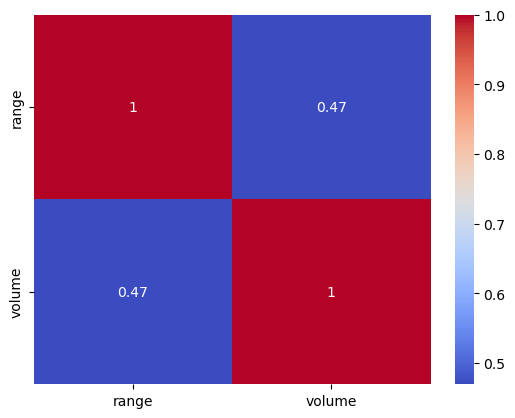

In [36]:
# correlation matrix of range, volume, and no of trades
sns.heatmap(data[['range', 'volume']].corr(), annot=True, cmap='coolwarm')

In [ ]:
px.scatter_3d(data,x='atr',y='range',z='volume')

In [ ]:
# finding the optimale sample size 
from statsmodels.stats.power import NormalIndPower

# Parameters
rho = 0.5  # Expected correlation
alpha = 0.05
power = 0.9

# Compute sample size
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=np.arctanh(rho), alpha=alpha, power=power, alternative='two-sided')
sample_size=int(np.ceil(sample_size))
print(f"Required sample size: {sample_size}")


Required sample size: 70


In [ ]:
import scipy.stats as stats

# Sample data
s=data[['range', 'volume','no of trades']].sample(sample_size)

# Calculate correlation coefficient and p-value for range and volume
r, p_value = stats.pearsonr(s['range'], s['volume'])

# Print results
print('range and volume')
print(f"Correlation coefficient: {round(r,3)}")
print(f"P-value: {round(p_value,3)}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

# Calculate correlation coefficient and p-value for range and no of trades
r, p_value = stats.pearsonr(s['range'], s['no of trades'])

# Print results
print('range and no of trades')
print(f"Correlation coefficient: {round(r,3)}")
print(f"P-value: {round(p_value,3)}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


range and volume
Correlation coefficient: 0.422
P-value: 0.0
Reject the null hypothesis: There is a significant correlation.
range and no of trades
Correlation coefficient: 0.563
P-value: 0.0
Reject the null hypothesis: There is a significant correlation.


### There is a significant correlation between the range and volume, range and no of trades 

In [ ]:
# making a new column for day name
data['day'] = data.index.day_name()
# most of time market off on sunday and saturday so removing the row
data=data.drop(data[(data['day']=='Sunday') | (data['day']=='Saturday')].index)

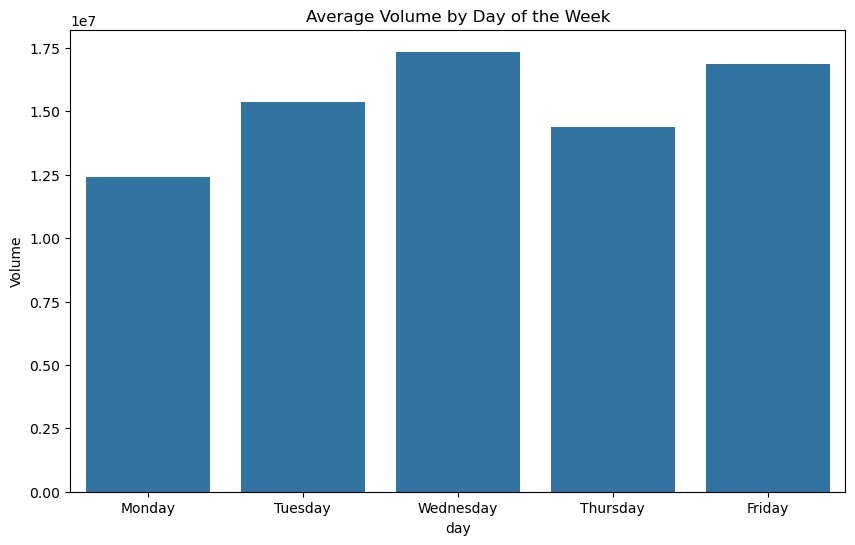

In [ ]:
# Group by day of the week
day_group = data.groupby('day').mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_group.index, y=day_group['volume'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Average Volume by Day of the Week')  
plt.ylabel('Volume')
plt.show()


In [ ]:
# independent test on day and volume
from scipy.stats import f_oneway

# Perform ANOVA test
anova_result = f_oneway(
    data[data['day'] == 'Monday']['volume'],
    data[data['day'] == 'Tuesday']['volume'],
    data[data['day'] == 'Wednesday']['volume'],
    data[data['day'] == 'Thursday']['volume'],
    data[data['day'] == 'Friday']['volume'])

# Print the results
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Decision
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in volume across different days.")
else:
    print("Fail to reject the null hypothesis: No significant difference in volume across different days.")

F-statistic: 2.1402753468503457
P-value: 0.07651567797672514
Fail to reject the null hypothesis: No significant difference in volume across different days.


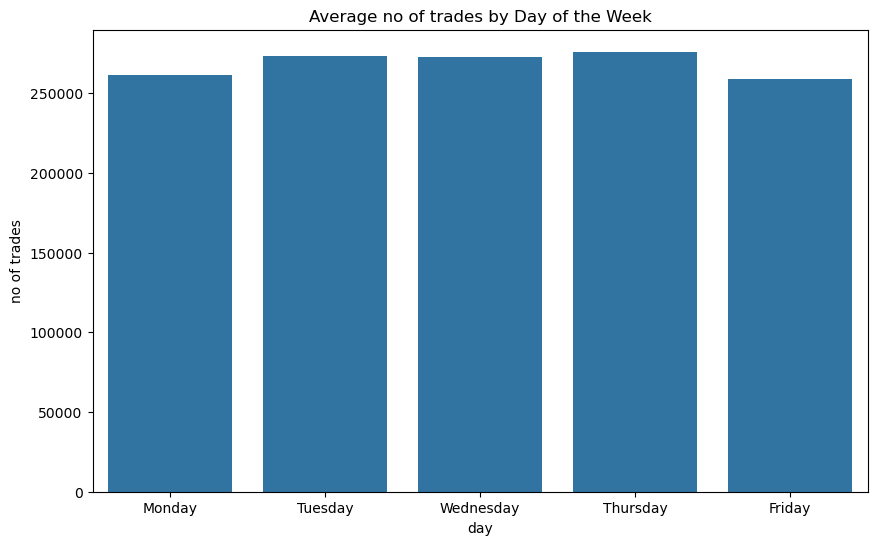

In [ ]:
# Group by day of the week
day_group = data.groupby('day').mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_group.index, y=day_group['no of trades'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Average no of trades by Day of the Week')  
plt.ylabel('no of trades')
plt.show()

In [ ]:
# independent test on day and no of trades
from scipy.stats import f_oneway

# Perform ANOVA test
anova_result = f_oneway(
    data[data['day'] == 'Monday']['no of trades'],
    data[data['day'] == 'Tuesday']['no of trades'],
    data[data['day'] == 'Wednesday']['no of trades'],
    data[data['day'] == 'Thursday']['no of trades'],
    data[data['day'] == 'Friday']['no of trades'])

# Print the results
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Decision
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in no of trades across different days.")
else:
    print("Fail to reject the null hypothesis: No significant difference in no of trades across different days.")

F-statistic: 0.3693150796878424
P-value: 0.8303806835672917
Fail to reject the null hypothesis: No significant difference in no of trades across different days.


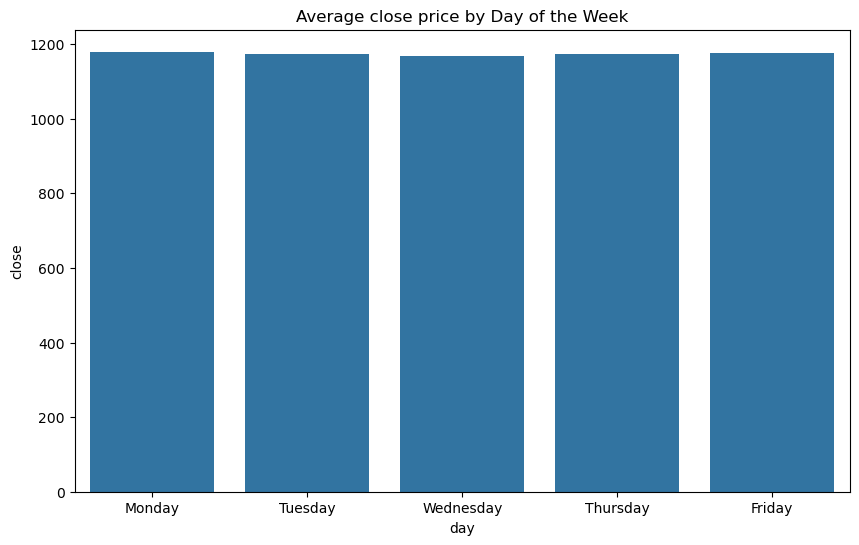

In [ ]:
# Group by day of the week
day_group = data.groupby('day').mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_group.index, y=day_group['close'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Average close price by Day of the Week')  
plt.ylabel('close')
plt.show()

In [23]:
data['day_change']=data['close'].diff()

In [28]:
data.head()

,close,high,low,open,volume,day_change
Date,,,,,,
2023-02-21,833.107239,838.227600,825.938697,833.302312,11704445,NaN
2023-02-22,818.526306,833.009590,814.137425,830.229989,13880984,-14.580933
2023-02-23,819.013977,823.597931,812.967062,815.892983,11743574,0.487671
2023-02-24,818.965271,824.719546,814.917723,823.110326,8246139,-0.048706
2023-02-27,835.252808,837.105855,812.967010,812.967010,14422574,16.287537


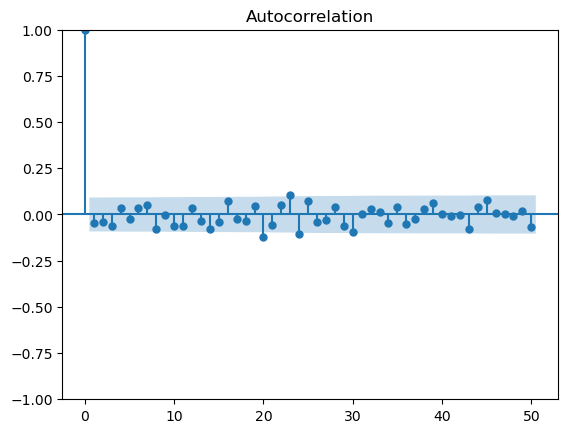

In [30]:
# acf plot of volume
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['day_change'][1:], lags=50)
plt.show()

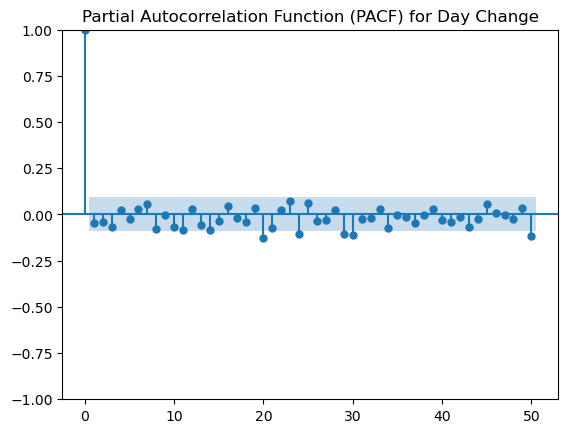

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF for day_change
plot_pacf(data['day_change'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF) for Day Change')
plt.show()

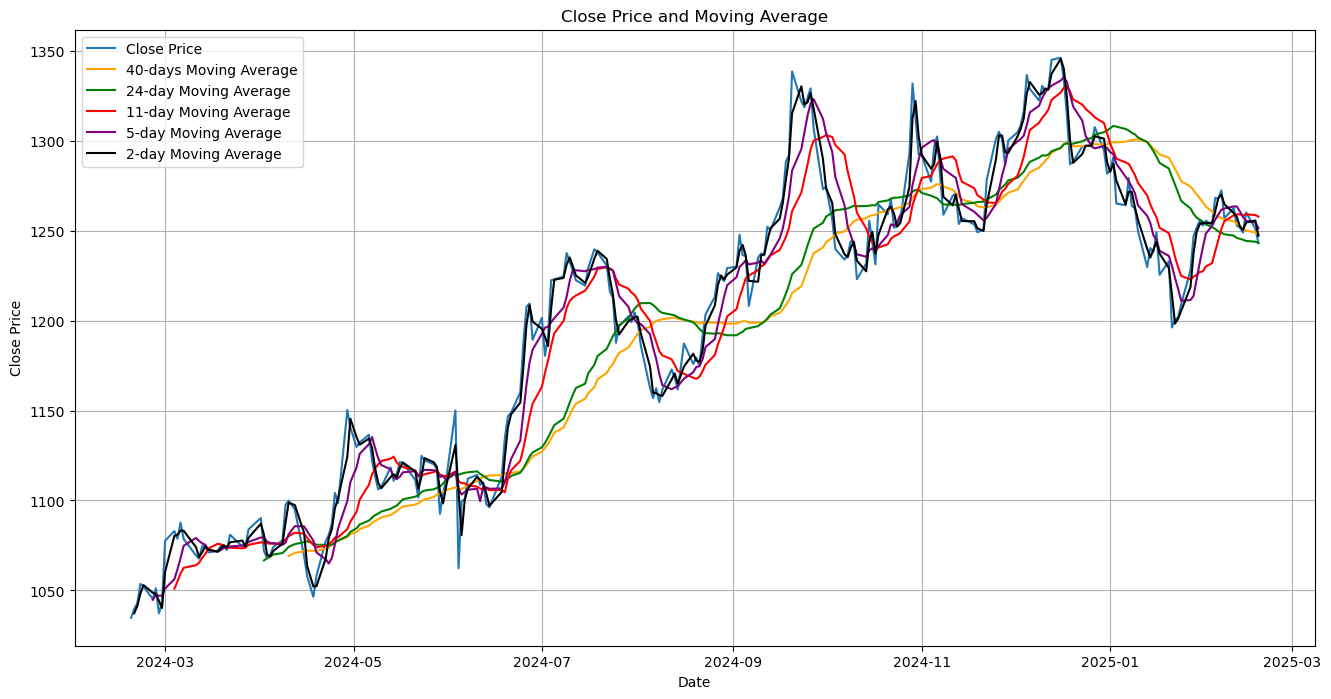

In [37]:
# Calculate the moving average
data['ma35'] = data['close'].rolling(window=35).mean()
data['ma29'] = data['close'].rolling(window=29).mean()
data['ma11'] = data['close'].rolling(window=11).mean()
data['ma6'] = data['close'].rolling(window=6).mean()
data['ma2'] = data['close'].rolling(window=2).mean()

# Plot the close data and the moving average
plt.figure(figsize=(16, 8))
plt.plot(data['close'], label='Close Price')
plt.plot(data['ma35'], label='40-days Moving Average', color='orange')
plt.plot(data['ma29'], label='24-day Moving Average', color='green')
plt.plot(data['ma11'], label='11-day Moving Average', color='red')
plt.plot(data['ma6'], label='5-day Moving Average', color='purple')
plt.plot(data['ma2'], label='2-day Moving Average', color='black')
plt.title('Close Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

In [38]:
# new feacher
data['F1'] = (data['close'] - data['close'].shift(1))
data['F2'] =  (data['close'].shift(1)-data['close'].shift(2))
data['F3'] = (data['close'].shift(2) - data['close'].shift(3))


In [47]:
import pandas as pd

def calculate_atr(data, period=14):
  
    # Calculate True Range (TR)
    data['Previous Close'] = data['close'].shift(1)
    data['High-Low'] = data['high'] - data['low']
    data['High-PrevClose'] = abs(data['high'] - data['Previous Close'])
    data['Low-PrevClose'] = abs(data['low'] - data['Previous Close'])

    data['True Range'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate ATR
    data['ATR'] = data['True Range'].rolling(window=period).mean()

    # Clean up and drop intermediate columns
    return data.drop(['Previous Close', 'High-Low', 'High-PrevClose', 'Low-PrevClose', 'True Range'], axis=1)


period = 5

data = calculate_atr(data, period)



In [49]:
data.tail()

,close,high,low,open,volume,range,atr,prev_close,day_change,y,new_atr,ma35,ma29,ma11,ma6,ma2,F1,F2,F3,ATR
Date,,,,,,,,,,,,,,,,,,,,
2025-02-14,1260.099976,14.599976,-4.450073,3.199951,10368438,19.050049,21.630794,1248.900024,11.199951,1,21.630794,1249.955713,1244.281031,1259.081820,1255.508341,1254.500000,11.199951,-2.900024,-0.949951,1262.630029
2025-02-17,1251.150024,-1.949951,-26.849976,-8.949951,8386151,24.900024,22.003593,1260.099976,-8.949951,-1,-22.003593,1249.084284,1243.846549,1258.681818,1254.550008,1255.625000,-8.949951,11.199951,-2.900024,1267.130005
2025-02-18,1243.050049,6.449951,-14.099976,1.750000,8135042,20.549927,21.899759,1251.150024,-8.099976,-1,-21.899759,1247.924285,1243.179309,1257.777277,1251.291687,1247.100037,-8.099976,-8.949951,11.199951,1264.820020
2025-02-19,1261.650024,21.399902,-12.800049,-8.200073,10683412,34.199951,22.778345,1243.050049,18.599976,1,22.778345,1247.097144,1243.586207,1257.181829,1252.775024,1252.350037,18.599976,-8.099976,-8.949951,1263.820044
2025-02-20,1248.550049,2.349976,-14.900024,-6.300049,4826024,17.250000,22.383463,1261.650024,-13.099976,-1,-22.383463,1246.625715,1244.234484,1255.440929,1252.233358,1255.100037,-13.099976,18.599976,-8.099976,1267.590039


In [50]:
data['close_diff'] = data['close'].diff()
data['volume_diff'] = data['volume'].diff()

In [51]:
# Calculate thresholds
Uclose_threshold = data['close_diff'].abs().mean() + 1.5*data['close_diff'].abs().std()
Uvolume_threshold = data['volume_diff'].abs().mean() + data['volume_diff'].abs().std()

Lclose_threshold = data['close_diff'].abs().mean() - 1.5*data['close_diff'].abs().std()
Lvolume_threshold = data['volume_diff'].abs().mean() - data['volume_diff'].abs().std()

# Updated function
def market_santiment(row):
    if row['close_diff'] > Uclose_threshold:
        if row['volume_diff'] > Uvolume_threshold or row['volume_diff'] < Lvolume_threshold:
            return 1
    elif row['close_diff'] < Lclose_threshold: 
        if row['volume_diff'] > Uvolume_threshold or row['volume_diff'] < Lvolume_threshold:   
                return -1
    else:
        return 0

# Apply row-wise
data['market_santiment'] = data.apply(market_santiment, axis=1)

In [71]:
data.ma2=data.ma2-data.prev_close
data.ma6=data.ma6-data.prev_close
data.ma11=data.ma11-data.prev_close
data.ma29=data.ma29-data.prev_close
data.ma35=data.ma35-data.prev_close

In [118]:
data.head()

,close,high,low,open,volume,prev_close,atr,day_change,y,ma35,ma29,ma11,ma6,ma2,F1,F2,F3
Date,,,,,,,,,,,,,,,,,
2023-02-20,831.059021,NaN,NaN,NaN,9013430,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-21,833.107178,7.168518,-5.120385,2.243230,11704445,831.059021,NaN,2.048157,1,NaN,NaN,NaN,NaN,832.083099,2.048157,NaN,NaN
2023-02-22,818.526306,-0.097588,-18.969753,-2.877189,13880984,833.107178,NaN,-14.580872,-1,NaN,NaN,NaN,NaN,825.816742,-14.580872,2.048157,NaN
2023-02-23,819.013977,5.071625,-5.559244,-2.633323,11743574,818.526306,NaN,0.487671,1,NaN,NaN,NaN,NaN,818.770142,0.487671,-14.580872,2.048157
2023-02-24,818.965210,5.705508,-4.096315,4.096287,8246139,819.013977,NaN,-0.048767,-1,NaN,NaN,NaN,NaN,818.989594,-0.048767,0.487671,-14.580872


In [39]:
# subset of data for training the mdoel
x=data[['close','ma29','ma11','ma6','F1','F2','F3']]
x['close']=x['close'].shift(-1) 
x=x.dropna()

In [40]:
# splitting the data into x,y
y = x['close'].values
X = x[['ma6','ma11','ma29','F1','F2','F3']].values
# splitting into train and test
size=int(0.85*len(X))
X_train = X[:size]
y_train = y[:size]
X_test = X[size:]
y_test = y[size:]

In [41]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert X_train to a DataFrame for easier manipulation
X_train_df = pd.DataFrame(X_train, columns=['ma6', 'ma11', 'ma29', 'F1', 'F2', 'F3'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_data)

  feature           VIF
0     ma6  12015.316018
1    ma11  19887.993512
2    ma29   3669.000025
3      F1      1.042869
4      F2      1.070973
5      F3      1.087356


In [42]:

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Xt=scaler.fit_transform(X)
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float64)
y_train_tensor = torch.tensor(y_train, dtype=torch.float64).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float64)
y_test_tensor = torch.tensor(y_test, dtype=torch.float64).view(-1, 1)
Xt=torch.tensor(Xt, dtype=torch.float64)


In [43]:
# Convert X_train to a DataFrame for easier manipulation
X_train_df = pd.DataFrame(X_train_scaled, columns=[ 'ma6', 'ma11', 'ma29', 'F1', 'F2', 'F3'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_data)

  feature        VIF
0     ma6  51.717554
1    ma11  84.709402
2    ma29  15.673162
3      F1   1.041323
4      F2   1.068823
5      F3   1.083881


In [44]:
data.head()

,close,high,low,open,volume,range,ma35,ma29,ma11,ma6,ma2,F1,F2,F3
Date,,,,,,,,,,,,,,
2024-02-19,1034.841309,1037.072104,1014.615404,1014.615404,9388255,22.456700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-20,1039.798584,1043.665320,1024.430881,1032.164354,11293528,19.234439,NaN,NaN,NaN,NaN,1037.319946,4.957275,NaN,NaN
2024-02-21,1042.971191,1054.918389,1039.054954,1047.779892,15946325,15.863434,NaN,NaN,NaN,NaN,1041.384888,3.172607,4.957275,NaN
2024-02-22,1053.629517,1056.901399,1031.420804,1046.986751,13432573,25.480595,NaN,NaN,NaN,NaN,1048.300354,10.658325,3.172607,4.957275
2024-02-23,1052.241455,1060.867149,1048.622585,1060.867149,13142759,12.244564,NaN,NaN,NaN,NaN,1052.935486,-1.388062,10.658325,3.172607


# model

## price = w1(trend) + w2(momentum)
#### trend = Long term trend + short term trend
#### Long term trend  = Moving average of last 35 days(ma35) + Moving average of last 29 days(ma29) + Moving average of last 11 days(ma11)
#### short term trend = Moving average of last 6 days(ma6) + Moving average of last 2 days(ma2)
##### t= Current day, t-1 = prev. day .......
#### momentum = {F1=(price(t-1)-price(t-2)),F2=(price(t-2)-price(t-3)),F3=(price(t-3)-price(t-4))}
#### price=alfa0 + alfa1(ma35) + alfa2(ma29) +alfa3(m11) + alfa4(ma6) +alfa5(ma2) + alfa6(F1) +alfa7(F2) + alfa8(F3)


In [45]:
# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        return out


In [46]:
# Set the parameters
input_dim = X_train_tensor.shape[1]
hidden_dim = 1
output_dim = 1
learning_rate = 0.5
epochs = 1000

# Create the model
model = ANN(input_dim, hidden_dim, output_dim).double()  

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/1000], Loss: 198017.2011
Epoch [100/1000], Loss: 760.9398
Epoch [150/1000], Loss: 267.7208
Epoch [200/1000], Loss: 264.8967
Epoch [250/1000], Loss: 264.6893
Epoch [300/1000], Loss: 266.6497
Epoch [350/1000], Loss: 264.6676
Epoch [400/1000], Loss: 264.7159
Epoch [450/1000], Loss: 264.6696
Epoch [500/1000], Loss: 264.6674
Epoch [550/1000], Loss: 264.7229
Epoch [600/1000], Loss: 264.9142
Epoch [650/1000], Loss: 264.6689
Epoch [700/1000], Loss: 264.6674
Epoch [750/1000], Loss: 264.6676
Epoch [800/1000], Loss: 264.6920
Epoch [850/1000], Loss: 264.6747
Epoch [900/1000], Loss: 264.6675
Epoch [950/1000], Loss: 264.6674
Epoch [1000/1000], Loss: 265.8188


In [47]:
# Make predictions
model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor).numpy()
    test_predictions = model(X_test_tensor).numpy()

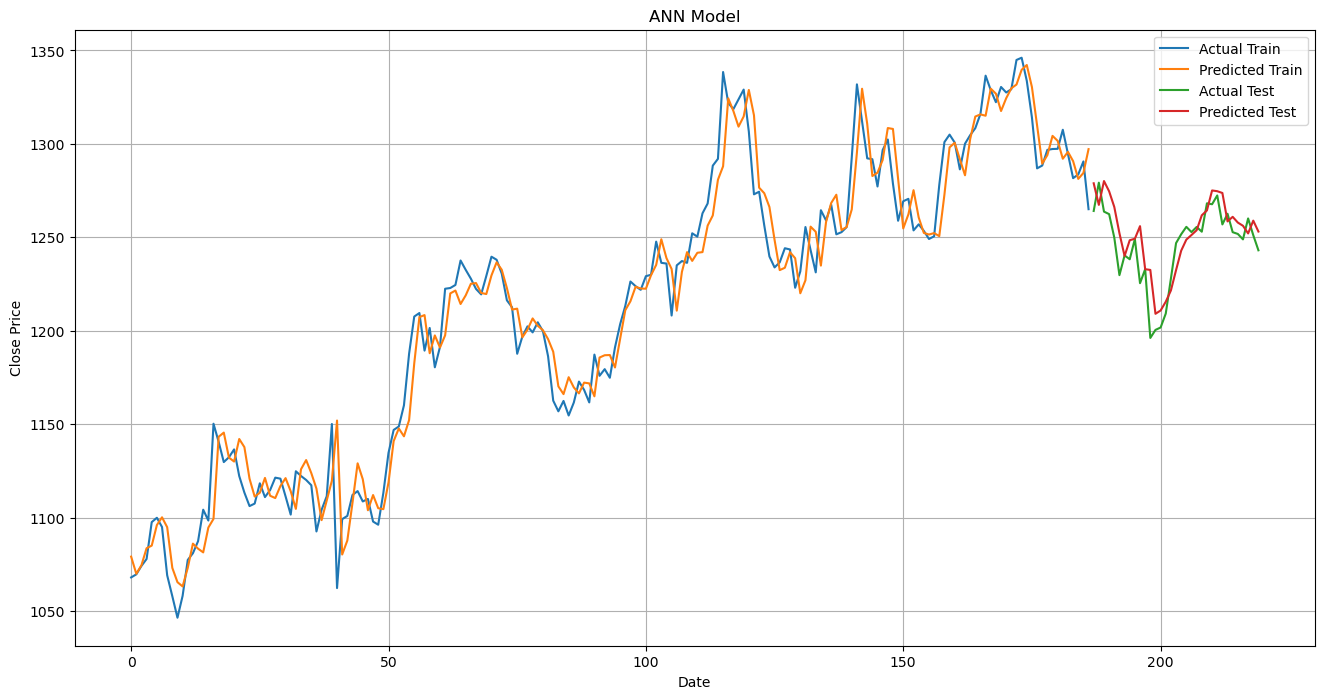

In [48]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.title('ANN Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(y_train, label='Actual Train')
plt.plot(train_predictions, label='Predicted Train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted Test')
plt.legend()
plt.grid()
plt.show()

In [49]:
y_train_data=pd.DataFrame(y_train,columns=['y_train'])
y_train_data['y_pred']=train_predictions
y_train_data['res'] = y_train_data['y_train'] - y_train_data['y_pred']

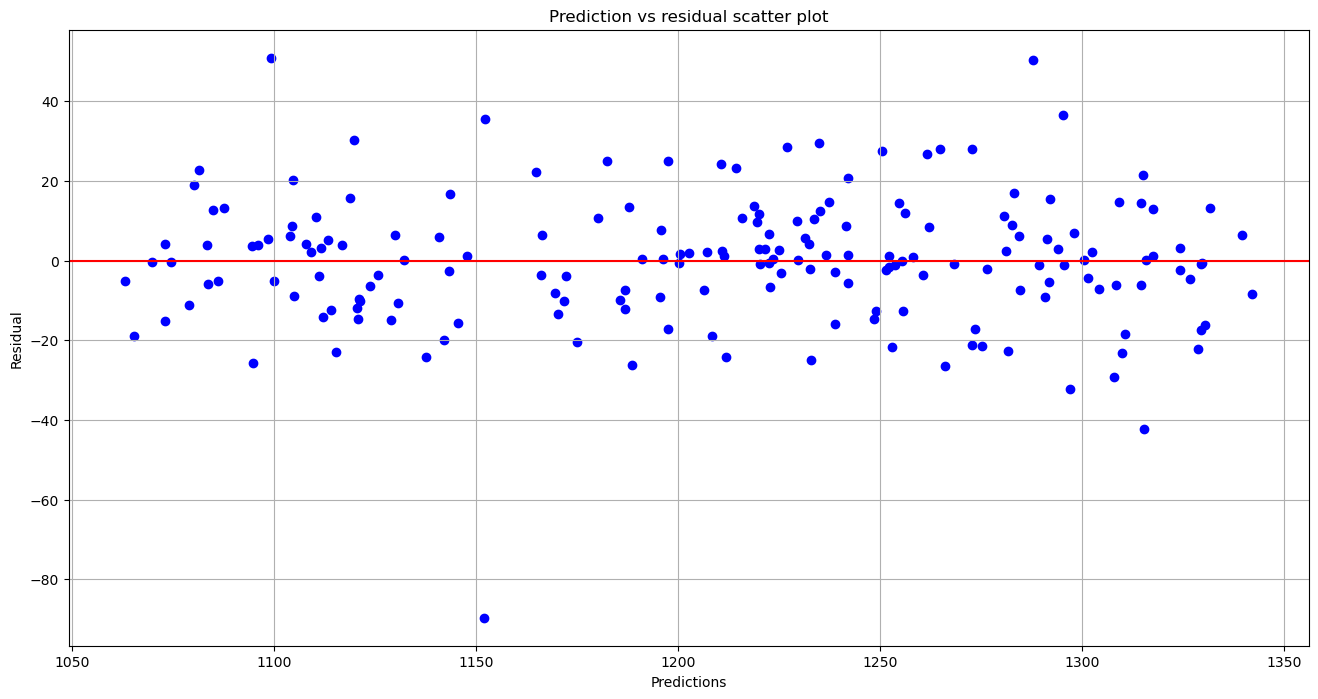

In [50]:
# residual vs predictions plot
plt.figure(figsize=(16, 8))
plt.scatter(y_train_data['y_pred'], y_train_data['res'], color='blue')
plt.title('Prediction vs residual scatter plot')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid()
plt.show()

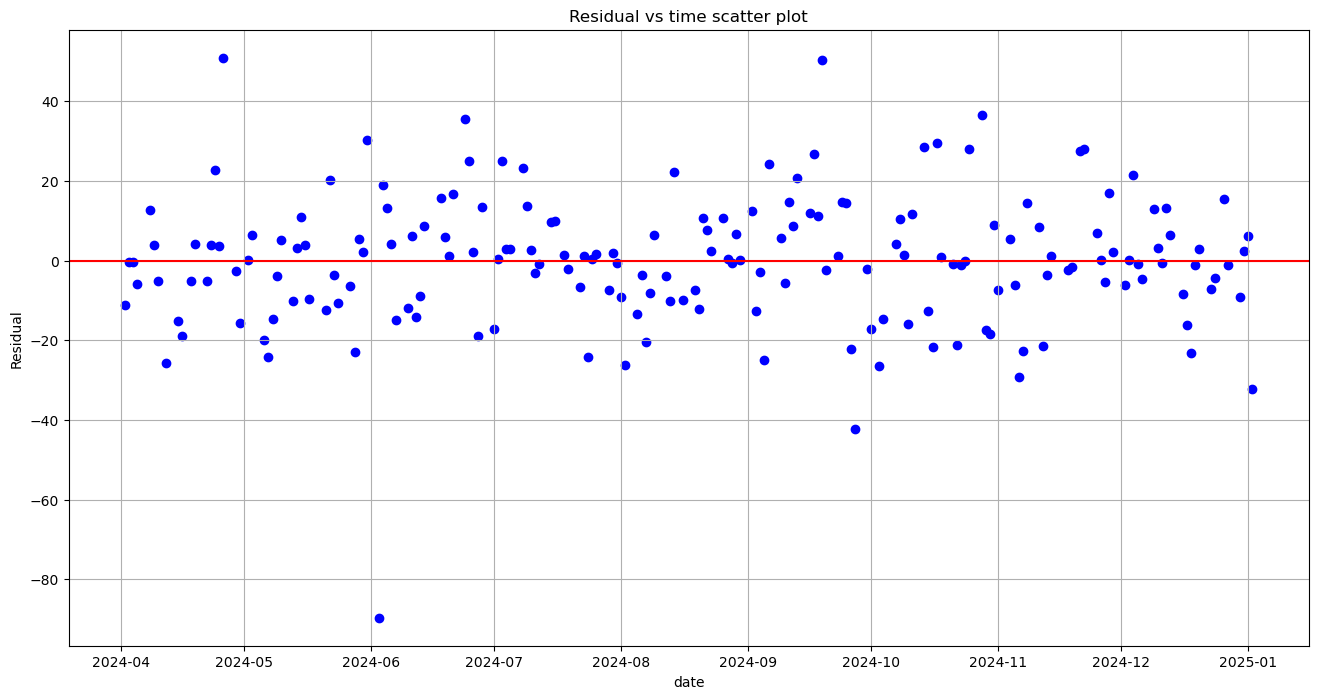

In [51]:
#residual vs date plot
plt.figure(figsize=(16, 8))
plt.scatter(x=x.iloc[0:len(y_train_data)].index,y = y_train_data['res'], color='blue')
plt.title('Residual vs time scatter plot')
plt.xlabel('date')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid()
plt.show()

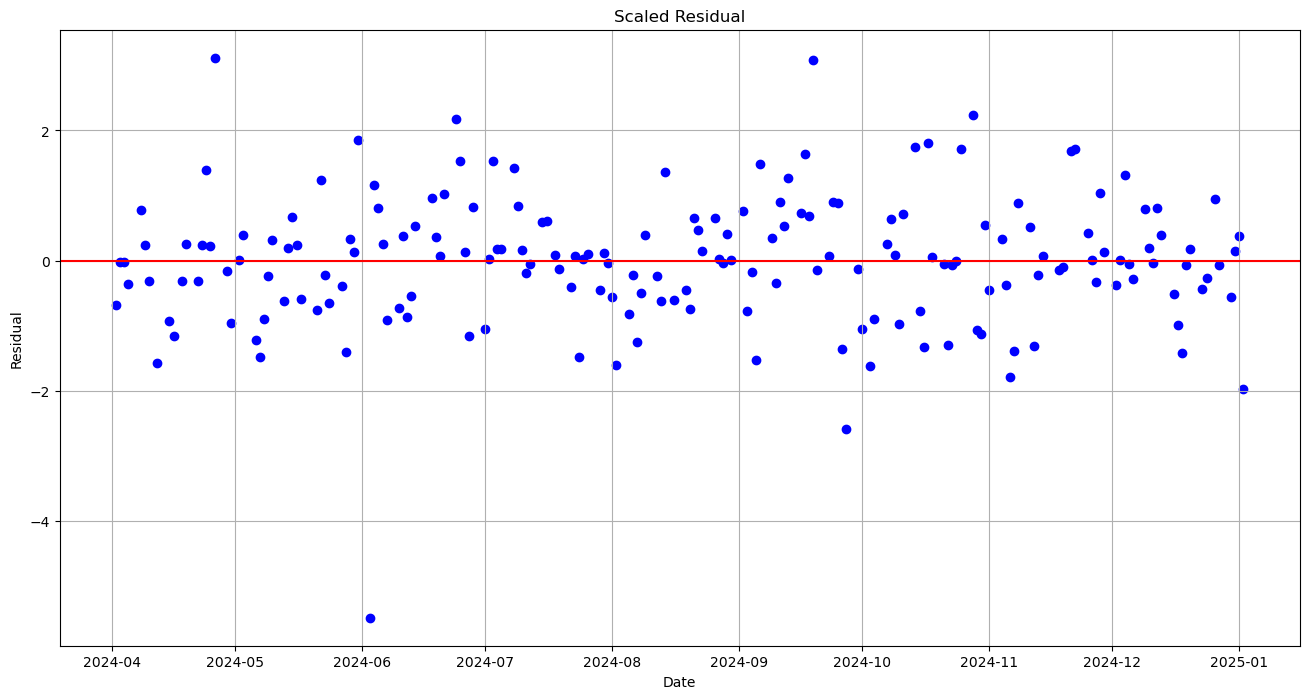

In [52]:
# scaled residual vs date plot
plt.figure(figsize=(16, 8))
plt.scatter(x.iloc[0:len(y_train_data)].index, scaler.fit_transform(y_train_data['res'].values.reshape(-1, 1)), color='blue')
plt.title('Scaled Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid()
plt.show()

In [53]:
# Get the model weights and biases
weights = model.fc1.weight.data.numpy()
biases = model.fc1.bias.data.numpy()

print("Weights:", weights)
print("Biases:", biases)

Weights: [[-3.10255857  1.18018617 -0.33369522 -0.2906705  -0.27782135 -0.1264135 ]]
Biases: [-34.55115528]


In [100]:
# Get the model weights and biases
weights = model.fc2.weight.data.numpy()
biases = model.fc2.bias.data.numpy()


print("Weights:", weights)
print("Biases:", biases)

Weights: [[33.94348576]]
Biases: [21.08982406]
